### Importing Libraries
We start by importing essential libraries for data manipulation, visualization, and machine learning tasks:
- `pandas` and `numpy` for data handling.
- `matplotlib` and `seaborn` for visualizations.
- `scikit-learn` for machine learning implementations, including KNN.


In [1]:
# Importing libraries for data manipulation, visualization, and modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing libraries for machine learning tasks
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    mean_squared_error, r2_score
)

# To enable inline plotting
%matplotlib inline


### Loading the Dataset
The Wine Quality dataset is loaded into a pandas DataFrame.
We display the first few rows to understand its structure, including features and target variables.

In [2]:
# Load the dataset
wine_data = pd.read_csv("WineQT.csv")

# Display the first few rows
wine_data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


### Dataset Overview
In this step, we:
1. Display information about the dataset to check column names, data types, and missing values.
2. Use `.describe()` to view summary statistics of the numerical features.
3. Verify if there are any missing values that need handling.


In [3]:
# Display dataset information
wine_data.info()

# Check for missing values
print("\nMissing values:\n", wine_data.isnull().sum())

# Summary statistics of numerical features
wine_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB

Missing values:
 fixed acidity           0
volatile acidity        0
citri

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


### Data Cleaning
We remove irrelevant columns, such as `Id`, that do not contribute to the prediction task.
This simplifies the dataset for further analysis and modeling.


In [4]:
# Drop the Id column as it is not relevant for analysis
wine_data = wine_data.drop(columns=["Id"])

# Confirm the column has been removed
wine_data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Correlation Analysis
To understand relationships between features and the target variable (`quality`), we plot a correlation heatmap.
This helps identify which features are most correlated with wine quality, guiding feature selection.


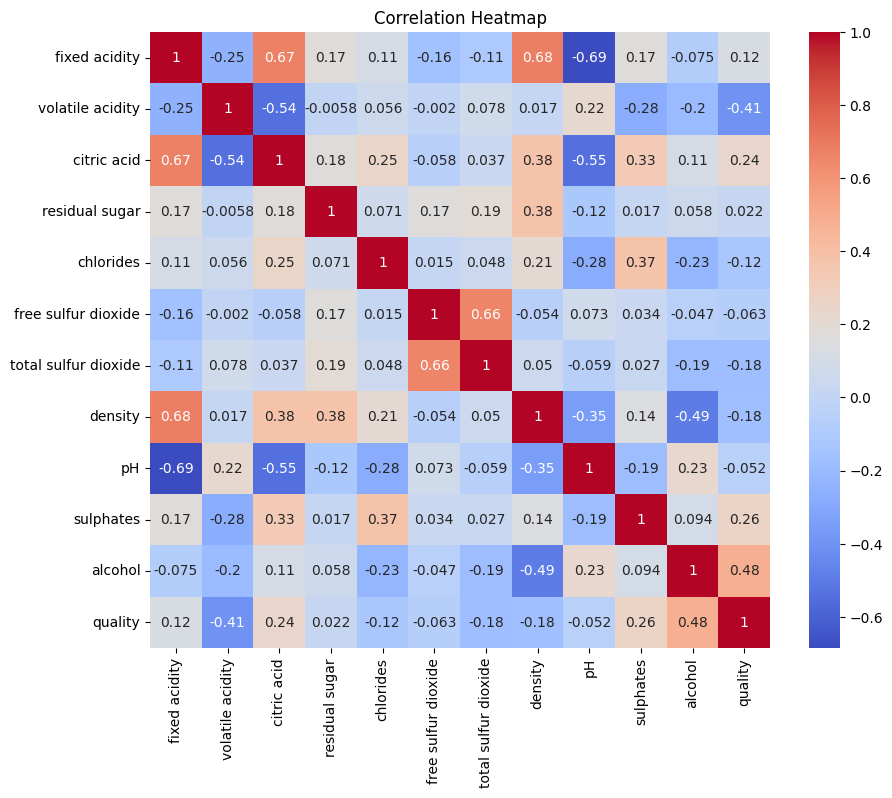

In [5]:
# Plot a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(wine_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


### Feature Distributions
We visualize the distributions of numerical features using histograms to identify their spread and potential outliers.
This also helps inform preprocessing steps like scaling.


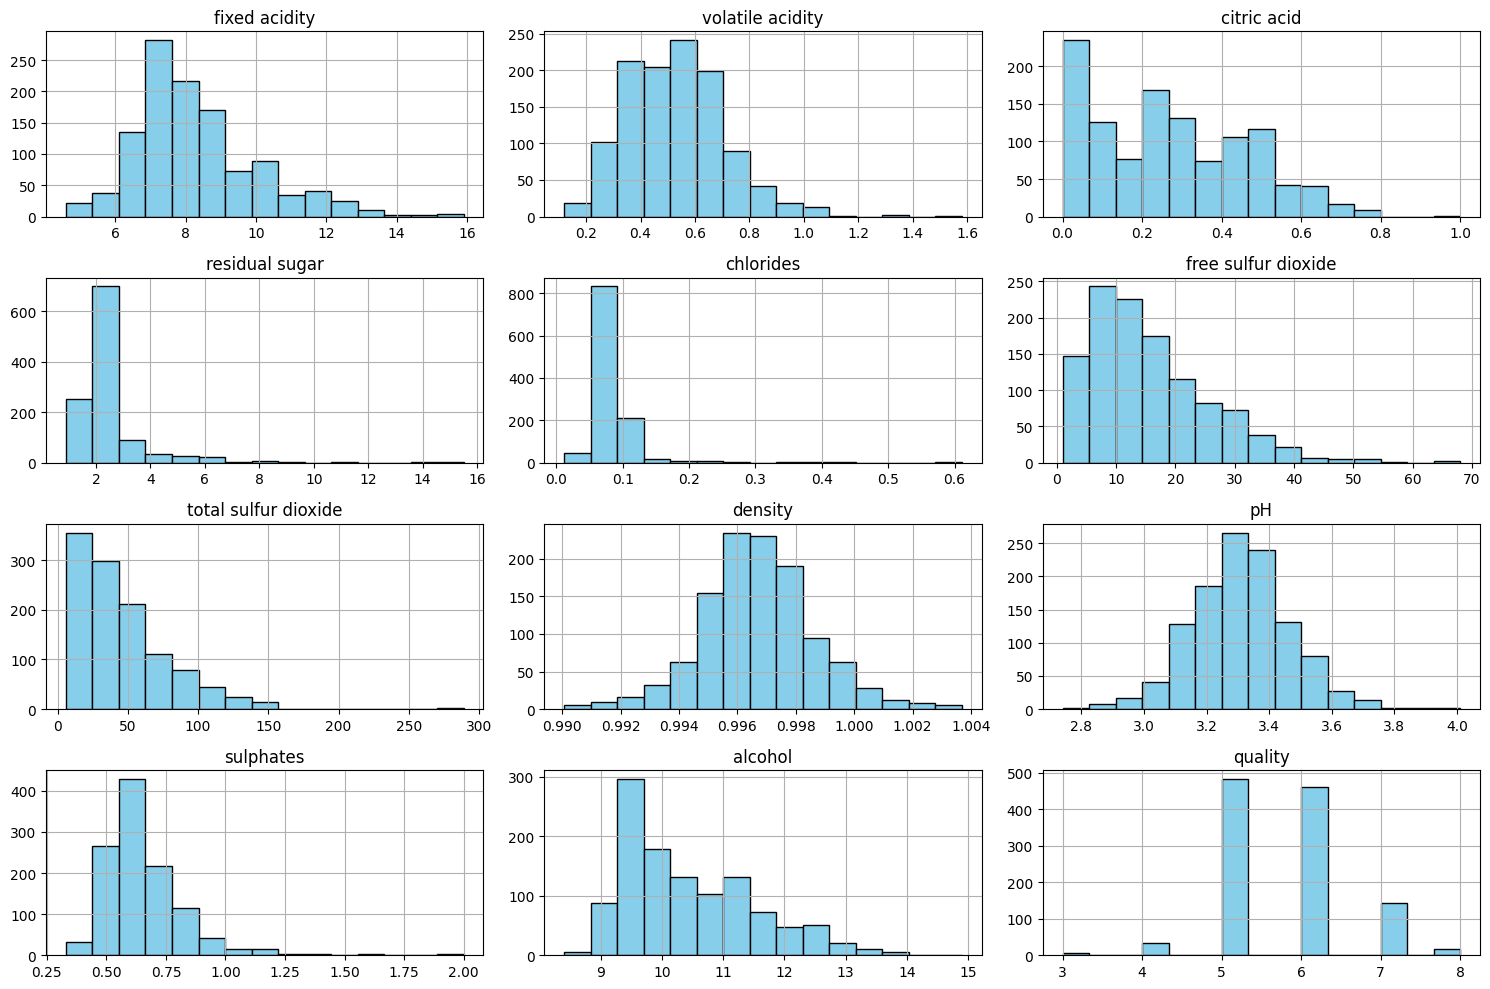

In [6]:
# Plot histograms for numerical features
wine_data.hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()


### Feature Scaling
KNN is a distance-based algorithm and is sensitive to feature magnitudes.
To ensure all features contribute equally, we standardize the features using `StandardScaler`.


In [7]:
from sklearn.preprocessing import StandardScaler

# Define features and target
X = wine_data.drop(columns=["quality"])  # Use all features except quality
y = wine_data["quality"]  # Target variable

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled features back to a DataFrame for readability
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382
1,-0.292593,1.941813,-1.365027,0.050060,0.234247,0.915920,0.643477,0.036165,-0.708928,0.130881,-0.593601
2,-0.292593,1.273492,-1.161568,-0.171289,0.107253,-0.060071,0.246745,0.140103,-0.325775,-0.045254,-0.593601
3,1.653789,-1.399789,1.483400,-0.466421,-0.252560,0.135127,0.429852,0.659792,-0.964363,-0.456235,-0.593601
4,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382


### Target Preparation and Train-Test Split
1. For **classification**, we binarize the `quality` column into two categories:
   - `1` for good quality (>=7).
   - `0` for not good quality (<7).
2. For **regression**, the continuous `quality` values are used as-is.
3. The dataset is split into training and test sets (80%-20%) for both tasks to evaluate model performance.


In [10]:
# Binarize target variable for classification (good quality vs. not good quality)
y_class = (wine_data["quality"] >= 7).astype(int)

# For classification (good quality vs not good quality)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_scaled, y_class, test_size=0.2, random_state=42
)

# For regression (predicting the exact quality)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Display the shapes of the splits
print("Classification - Training set shape:", X_train_class.shape)
print("Classification - Test set shape:", X_test_class.shape)
print("Regression - Training set shape:", X_train_reg.shape)
print("Regression - Test set shape:", X_test_reg.shape)



Classification - Training set shape: (914, 11)
Classification - Test set shape: (229, 11)
Regression - Training set shape: (914, 11)
Regression - Test set shape: (229, 11)


### KNN for Classification
We implement KNN for classification to predict whether a wine is of good quality:
1. Initialize the KNN classifier with default hyperparameters (`k=5`, Euclidean distance).
2. Train the model on the training set.
3. Evaluate performance on the test set using:
   - Classification report.
   - Confusion matrix.
   - ROC-AUC score.


In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize the KNN classifier with default hyperparameters
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Train the classifier
knn_classifier.fit(X_train_class, y_train_class)

# Make predictions
y_pred_class = knn_classifier.predict(X_test_class)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test_class, y_pred_class))
print("Confusion Matrix:\n", confusion_matrix(y_test_class, y_pred_class))
roc_auc = roc_auc_score(y_test_class, y_pred_class)
print(f"ROC-AUC Score: {roc_auc:.2f}")


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       201
           1       0.50      0.32      0.39        28

    accuracy                           0.88       229
   macro avg       0.70      0.64      0.66       229
weighted avg       0.86      0.88      0.87       229

Confusion Matrix:
 [[192   9]
 [ 19   9]]
ROC-AUC Score: 0.64


### Visualizing Classification Results
To better interpret the classification results, we plot a confusion matrix heatmap.
This shows the number of true positives, true negatives, false positives, and false negatives.


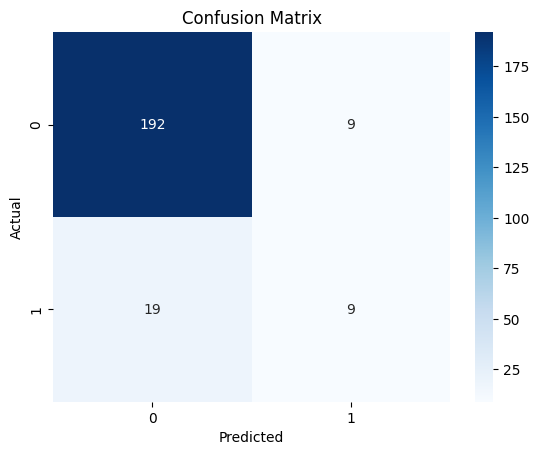

In [12]:
# Plot confusion matrix as a heatmap
sns.heatmap(confusion_matrix(y_test_class, y_pred_class), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


### KNN for Regression
We implement KNN for regression to predict the exact wine quality score:
1. Initialize the KNN regressor with default hyperparameters (`k=5`, Euclidean distance).
2. Train the model on the training set.
3. Evaluate performance on the test set using:
   - Root Mean Squared Error (RMSE): Measures the average prediction error.
   - R² Score: Represents how much variance in the target variable is explained by the model.


In [13]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the KNN regressor with default hyperparameters
knn_regressor = KNeighborsRegressor(n_neighbors=5, metric='euclidean')

# Train the regressor
knn_regressor.fit(X_train_reg, y_train_reg)

# Make predictions
y_pred_reg = knn_regressor.predict(X_test_reg)

# Evaluate the model
rmse = mean_squared_error(y_test_reg, y_pred_reg, squared=False)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"RMSE: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")


RMSE: 0.62
R^2 Score: 0.31


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Visualizing Regression Results
To interpret the regression results, we plot a scatter plot of actual vs. predicted quality scores:
- The red dashed line represents perfect predictions (Actual = Predicted).
- The scatter points show how well the model aligns with the actual values.


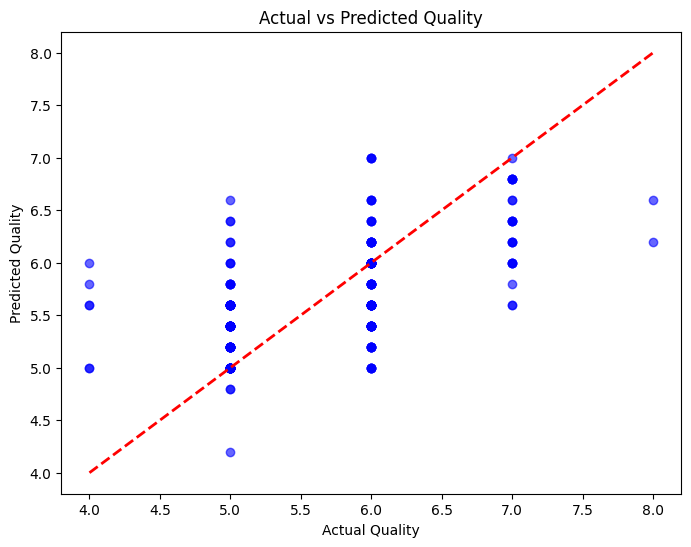

In [14]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.6, color='blue')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs Predicted Quality")
plt.show()
